1000 samples drawn from box muller in 0.01062020001700148 seconds


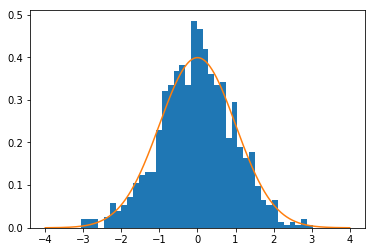

1000 samples drawn from scipy in 0.0015373000060208142 seconds


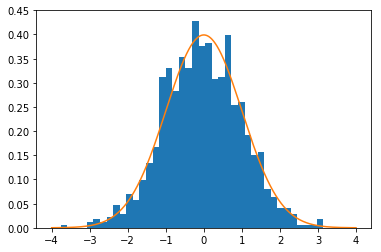

Estimated mean:		1.648210100351137
Estimated variance:	4.659232722652536


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in log


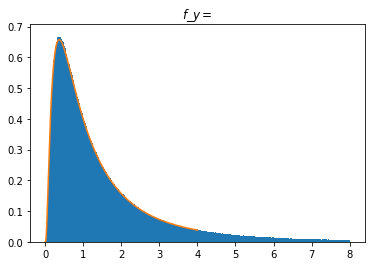

In [57]:
import numpy as np
from scipy.stats import uniform
from scipy.stats import norm
import scipy.linalg as la
import matplotlib.pyplot as plt
from timeit import default_timer as time

def box_muller(n=1):
    """
    Draw n samples from the standard normal distribution
    """
    
    uni = uniform(0, 1)
    
    # take n samples from Unif(0, 2*pi)
    theta = uni.rvs(n) * (2*np.pi)
    
    # take n samples from 
    R_2 = -2 * np.log( uni.rvs(n) )
    
    # transform these to the exp. distribution (half of normal)
    Z1 = np.sqrt(R_2) * np.cos(theta)
    Z2 = np.sqrt(R_2) * np.sin(theta)
    
    return np.vstack([Z1, Z2])

n = 1000
domain = np.linspace(-4, 4, 2000)
pdf = norm(0, 1).pdf(domain)

box_muller_start = time()

# plot 1000 draws using ours
samples = box_muller(n)[0, :]
print(f'{n} samples drawn from box muller in {time() - box_muller_start} seconds')

plt.hist(samples, bins=40, density=True)
plt.plot(domain, pdf)
plt.show()


scipy_start = time()

samples = norm(0, 1).rvs(n)
print(f'{n} samples drawn from scipy in {time() - scipy_start} seconds')

plt.hist(samples, bins=40, density=True)
plt.plot(domain, pdf)
plt.show()







# Problem 2.25 - Use MC methods to estimate the 
# mean and variance of Y = e**X where X ~ N(0, 1)
samples = norm(0, 1).rvs(9_000_000)
samples = np.exp(samples)
print(f'Estimated mean:\t\t{samples.mean()}')
print(f'Estimated variance:\t{samples.var()}')

pdf = lambda y: (1 / np.sqrt(2 * np.pi)) * np.exp( (-np.log(y)**2)/2 ) / np.abs(y)

plt.hist(samples[samples < 8], bins=1000, density=True)
plt.plot(domain, pdf(domain))
plt.title('$f\_{y} = \frac{1}{\sqrt{2\pi}}$')
plt.show()